### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук
#### Кафедра информационных технологий

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Кузнецов Юрий Владимирович
##### Группа:   НФИбд-01-20


## Москва 2023
***

### Вариант №25

Индивидуальное задание:
1. Набор данных: forest_fires
2. Независимая переменная: features/FFMC
3. Зависимая переменная: features/temp
4. Визуализация для независимой переменной – столбчатая диаграмма
5. Визуализация для зависимой переменной – эмпирическая плотность распределения
6. Показатель качества регрессии – MSE (mean squared error)

### Задание:

В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные. Вычислите матрицу корреляции признаков и определите пары признаков с наиболее низкой и наиболее высокой корреляцией.

2. Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.

3. Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Вычислите и сравните значения показателей качества $R^2$ двух подходов.

4. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду.

5. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака).

6. Используя созданный нормализующий слой, постройте регресоры на базе следующих моделей множественной регрессии:
    * линейной регрессии
    * гребневой регрессии (L2)
    * лассо регрессии (L1)

7. Определите на контрольной выборке модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей.

8. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).

9. Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка.

Решение:

Подключаем необходимые библиотеки:

In [98]:
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.12.0


Считаем из TFDS набор данных [__Forest Fires__](https://www.tensorflow.org/datasets/catalog/forest_fires?hl=en):

In [99]:
ds = tfds.load("ForestFires", split='train')
ds

<_PrefetchDataset element_spec={'area': TensorSpec(shape=(), dtype=tf.float32, name=None), 'features': {'DC': TensorSpec(shape=(), dtype=tf.float32, name=None), 'DMC': TensorSpec(shape=(), dtype=tf.float32, name=None), 'FFMC': TensorSpec(shape=(), dtype=tf.float32, name=None), 'ISI': TensorSpec(shape=(), dtype=tf.float32, name=None), 'RH': TensorSpec(shape=(), dtype=tf.float32, name=None), 'X': TensorSpec(shape=(), dtype=tf.uint8, name=None), 'Y': TensorSpec(shape=(), dtype=tf.uint8, name=None), 'day': TensorSpec(shape=(), dtype=tf.int64, name=None), 'month': TensorSpec(shape=(), dtype=tf.int64, name=None), 'rain': TensorSpec(shape=(), dtype=tf.float32, name=None), 'temp': TensorSpec(shape=(), dtype=tf.float32, name=None), 'wind': TensorSpec(shape=(), dtype=tf.float32, name=None)}}>

Оставим в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные.

In [100]:
df = tfds.as_dataframe(ds)
df.head()

,area,features/DC,features/DMC,features/FFMC,features/ISI,features/RH,features/X,features/Y,features/day,features/month,features/rain,features/temp,features/wind
0,10.820000,671.200012,181.100006,96.099998,14.300000,63.0,7,5,1,7,6.4,27.299999,4.9
1,24.590000,750.500000,96.699997,90.500000,11.400000,55.0,3,4,6,8,0.0,20.600000,5.4
2,0.170000,607.099976,131.699997,94.300003,22.700001,55.0,6,5,1,7,0.0,19.400000,4.0
3,14.680000,671.200012,181.100006,96.099998,14.300000,27.0,3,4,1,7,0.0,32.299999,2.2
4,88.489998,699.599976,133.300003,92.900002,9.200000,21.0,4,4,2,8,0.0,26.400000,4.5


In [101]:
df.rename(columns={name: name.removeprefix('features/') for name in list(df.columns. values)}, inplace=True)
df.drop(columns=['rain'],inplace=True)
df.head()

,area,DC,DMC,FFMC,ISI,RH,X,Y,day,month,temp,wind
0,10.820000,671.200012,181.100006,96.099998,14.300000,63.0,7,5,1,7,27.299999,4.9
1,24.590000,750.500000,96.699997,90.500000,11.400000,55.0,3,4,6,8,20.600000,5.4
2,0.170000,607.099976,131.699997,94.300003,22.700001,55.0,6,5,1,7,19.400000,4.0
3,14.680000,671.200012,181.100006,96.099998,14.300000,27.0,3,4,1,7,32.299999,2.2
4,88.489998,699.599976,133.300003,92.900002,9.200000,21.0,4,4,2,8,26.400000,4.5


In [102]:
corr_arr = df.corr()
corr_arr

,area,DC,DMC,FFMC,ISI,RH,X,Y,day,month,temp,wind
area,1.000000,0.049383,0.072994,0.040122,0.008258,-0.075519,0.063385,0.044873,0.023226,0.056496,0.097844,0.012317
DC,0.049383,1.000000,0.682192,0.330512,0.229154,-0.039192,-0.085916,-0.101178,0.000105,0.868698,0.496208,-0.203466
DMC,0.072994,0.682192,1.000000,0.382619,0.305128,0.073795,-0.048384,0.007782,0.062870,0.466645,0.469594,-0.105342
FFMC,0.040122,0.330512,0.382619,1.000000,0.531805,-0.300995,-0.021039,-0.046308,-0.041068,0.291477,0.431532,-0.028485
ISI,0.008258,0.229154,0.305128,0.531805,1.000000,-0.132517,0.006210,-0.024488,0.032909,0.186597,0.394287,0.106826
RH,-0.075519,-0.039192,0.073795,-0.300995,-0.132517,1.000000,0.085223,0.062221,0.092151,-0.095280,-0.527390,0.069410
X,0.063385,-0.085916,-0.048384,-0.021039,0.006210,0.085223,1.000000,0.539548,-0.024922,-0.065003,-0.051258,0.018798
Y,0.044873,-0.101178,0.007782,-0.046308,-0.024488,0.062221,0.539548,1.000000,-0.005453,-0.066292,-0.024103,-0.020341
day,0.023226,0.000105,0.062870,-0.041068,0.032909,0.092151,-0.024922,-0.005453,1.000000,-0.050837,0.052190,0.032478
month,0.056496,0.868698,0.466645,0.291477,0.186597,-0.095280,-0.065003,-0.066292,-0.050837,1.000000,0.368842,-0.086368


In [103]:
features = df.columns.values.tolist()

min = 1
max = -1

for i in range(0, len(corr_arr)):
  for j in range(i+1, len(corr_arr)):
    if corr_arr.iloc[i, j] < min:
      min = corr_arr.iloc[i, j]
    if corr_arr.iloc[i, j] > max:
      max = corr_arr.iloc[i, j]

print('Минимальное значение корреляции: ', min)
print('Пара с наиболее низкой корреляцией:\n', features[5], '|', features[10])
print()
print('Максимальное значение корреляции: ', max)
print('Пара с наиболее высокой корреляцией:\n', features[1], '|', features[9])

Минимальное значение корреляции:  -0.5273903390408509
Пара с наиболее низкой корреляцией:
 RH | temp

Максимальное значение корреляции:  0.8686977623519123
Пара с наиболее высокой корреляцией:
 DC | month


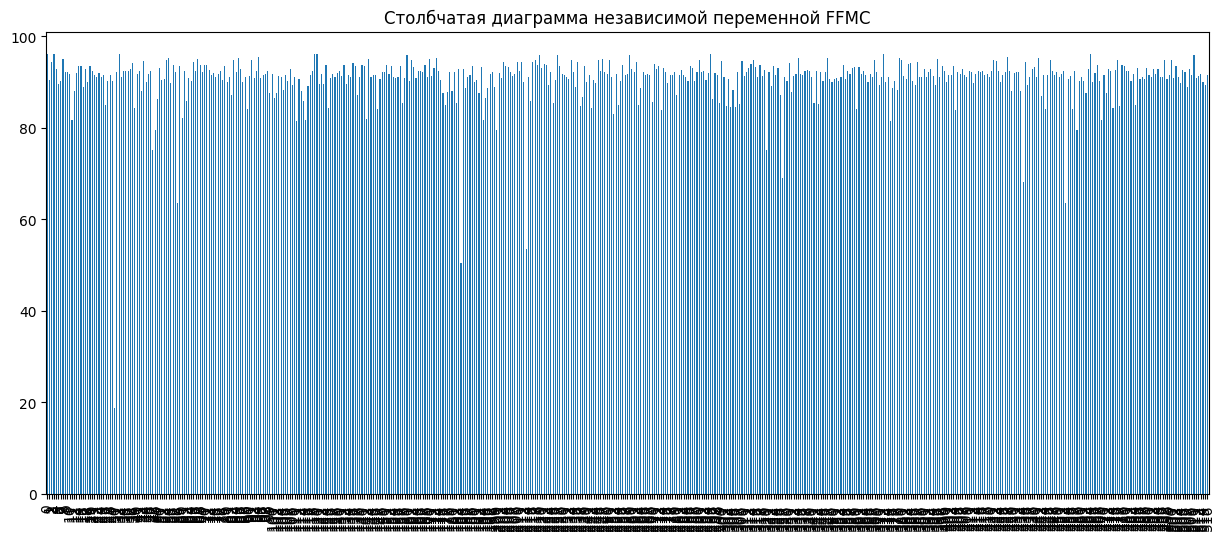

In [104]:
df['FFMC'].plot.bar(title='Столбчатая диаграмма независимой переменной FFMC', figsize=(15,6));

In [105]:
import seaborn as sns

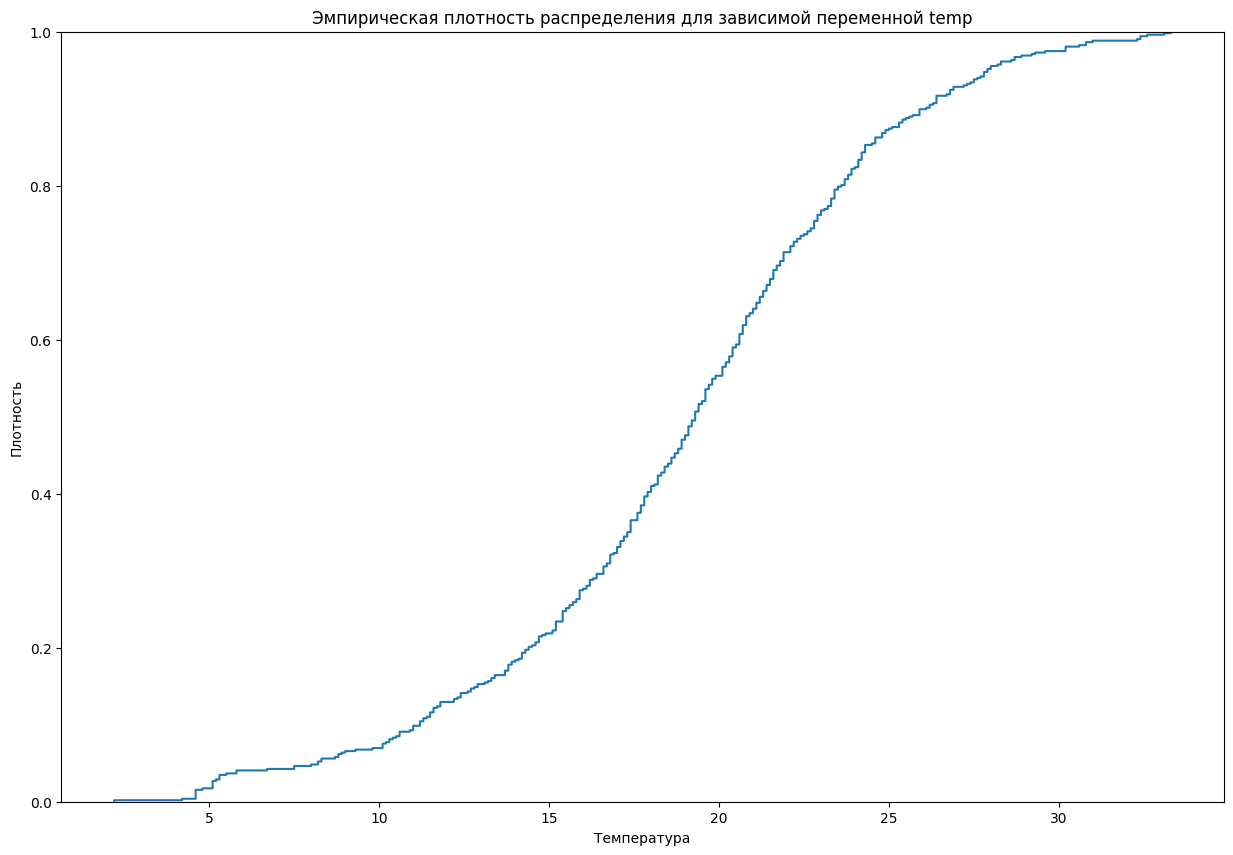

In [106]:
sns.ecdfplot(data=df['temp'])

plt.xlabel('Температура')
plt.ylabel('Плотность')
plt.title('Эмпирическая плотность распределения для зависимой переменной temp')

plt.show()

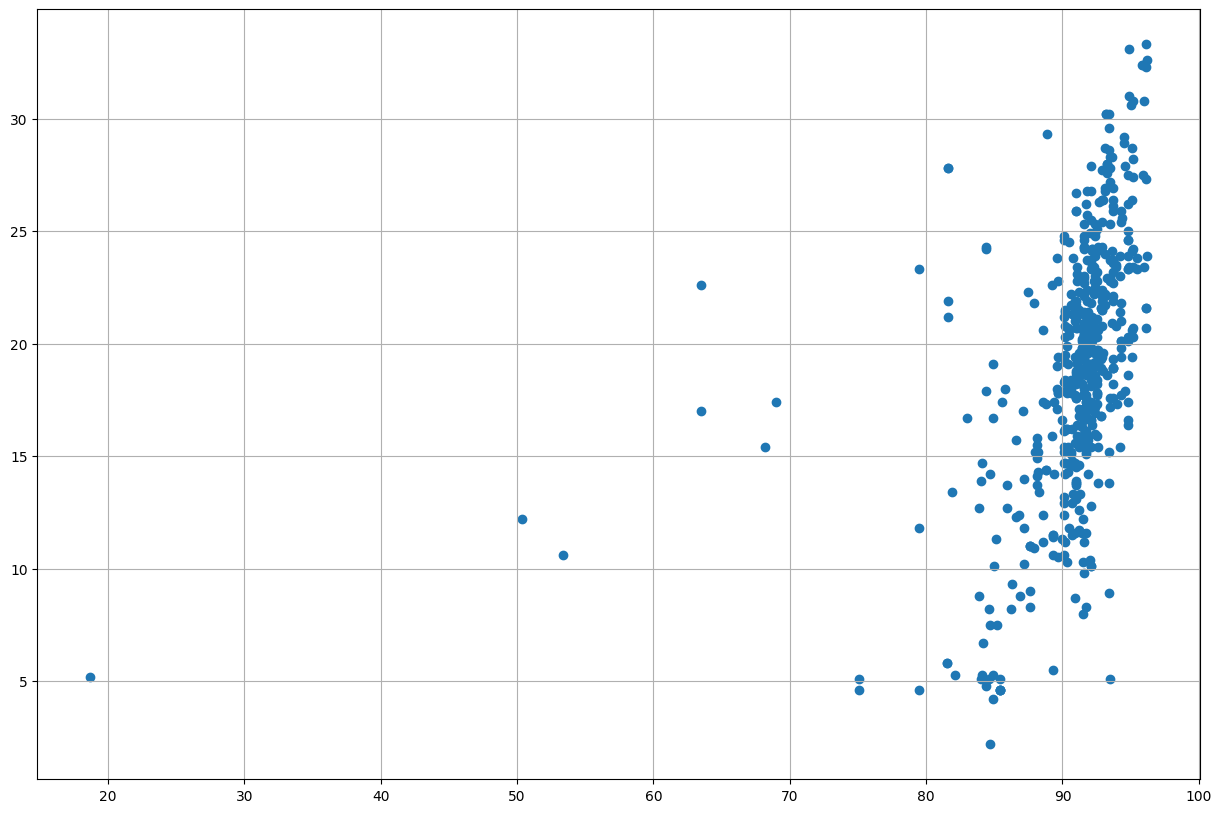

In [107]:
x = df['FFMC']
y = df['temp']

plt.scatter(x, y)
plt.grid()
plt.show()

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True)

In [110]:
class SimpleLinReg:
    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        numerator = np.sum((x_train - x_mean) * (y_train - y_mean))
        denominator = np.sum((x_train - x_mean) ** 2)
        self.a_ = numerator / denominator
        self.b_ = y_mean - self.a_ * x_mean

    def predict(self, x_test):
        return self.a_ * x_test + self.b_

In [111]:
from sklearn.metrics import r2_score
from IPython.display import clear_output

In [112]:
from sklearn.metrics import mean_squared_error

In [113]:
slmodel = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(1,))])

slmodel.compile(
  loss=tf.keras.losses.mean_absolute_error,
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
  metrics=['mean_absolute_error']
)

slmodel.fit(X_train, y_train, epochs=20)
y_pred_net = slmodel.predict(X_test)

slreg = SimpleLinReg()
slreg.fit(X_train, y_train)

y_pred_reg = slreg.predict(X_test)

clear_output(wait=True)

r2_net = r2_score(y_test, y_pred_net)
r2_reg = r2_score(y_test, y_pred_reg)

print('Метрика R2 сети с одним нейроном:', r2_net)
print('Метрика R2 парной линейной регрессии:', r2_reg)

Метрика R2 сети с одним нейроном: 0.11358295203132684
Метрика R2 парной линейной регрессии: 0.19802020065635628


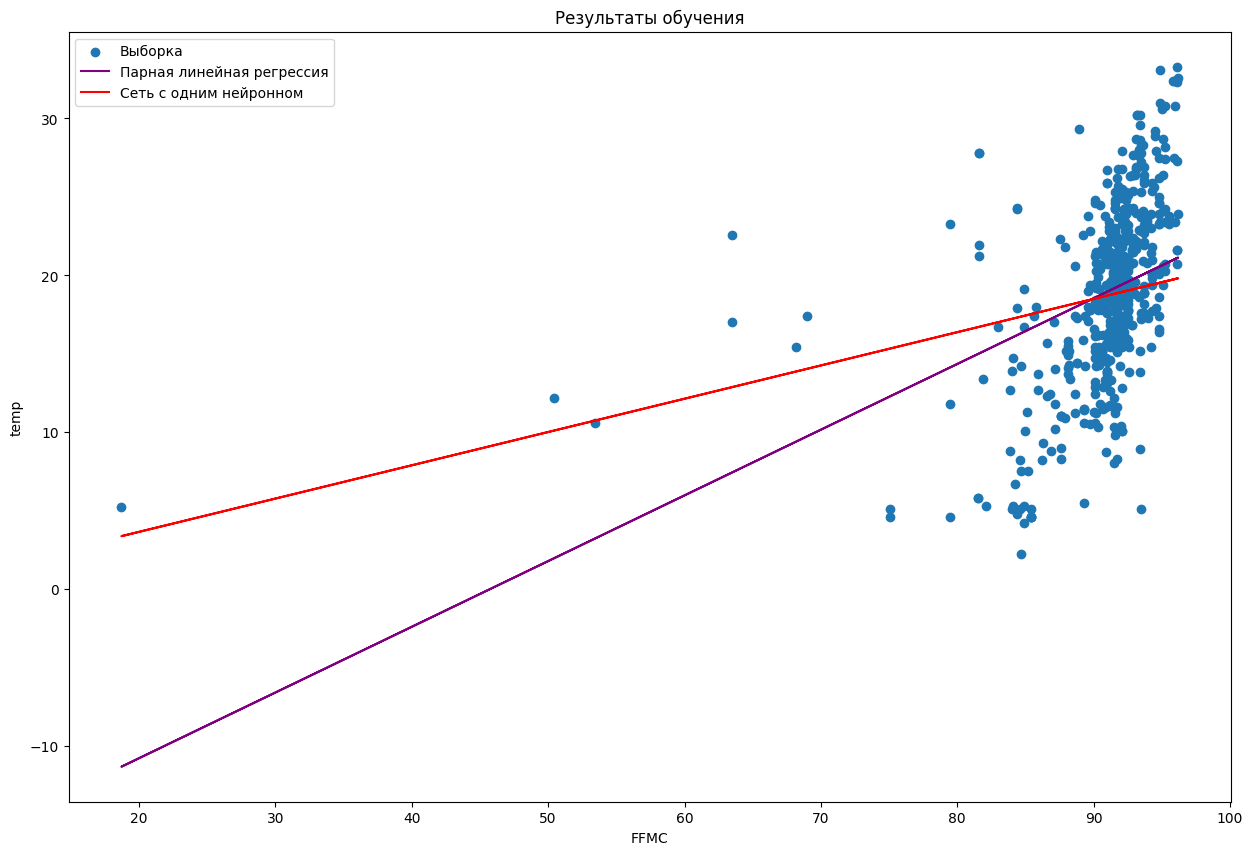

In [114]:
plt.scatter(x, y, label='Выборка')
plt.plot(x, slreg.predict(x), color='purple', label='Парная линейная регрессия')

plt.plot(x, slmodel.predict(x), color='red', label='Сеть с одним нейронном')
clear_output(wait=True)
plt.legend()

plt.title('Результаты обучения')
plt.xlabel("FFMC")
plt.ylabel("temp")

plt.show()

In [115]:
X = df.drop(columns=['temp'])
y = df['temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train)

In [116]:
model_LN = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(1)
])

model_LN.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1),
    metrics=['mean_absolute_error']
)

history_LN = model_LN.fit(
    X_train, y_train,
    epochs=64,
    validation_split = 0.2
)

clear_output()

In [117]:
model_L1 = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.L1(l1=0.01))
])

model_L1.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1),
    metrics=['mean_absolute_error']
)

history_L1 = model_L1.fit(
    X_train,
    y_train,
    epochs=64,
    validation_split = 0.2
)

clear_output()

In [118]:
model_L2 = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.L2(l2=1e-5))
])

model_L2.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1),
    metrics=['mean_absolute_error']
)

history_L2 = model_L2.fit(
    X_train,
    y_train,
    epochs=64,
    validation_split = 0.2
)

clear_output()

In [119]:
y_pred_LN = model_LN.predict(X_test, verbose=0)

print(r'Метрика линейной регрессии: %.4f' % r2_score(y_test, y_pred_LN))

y_pred_L1 = model_L1.predict(X_test, verbose=0)

print(r'Метрика лассо регрессии: %.4f' % r2_score(y_test, y_pred_L1))

y_pred_L2 = model_L2.predict(X_test, verbose=0)

print(r'Метрика гребневой регрессии: %.4f' % r2_score(y_test, y_pred_L2))

Метрика линейной регрессии: 0.6120
Метрика лассо регрессии: 0.6140
Метрика гребневой регрессии: 0.6103


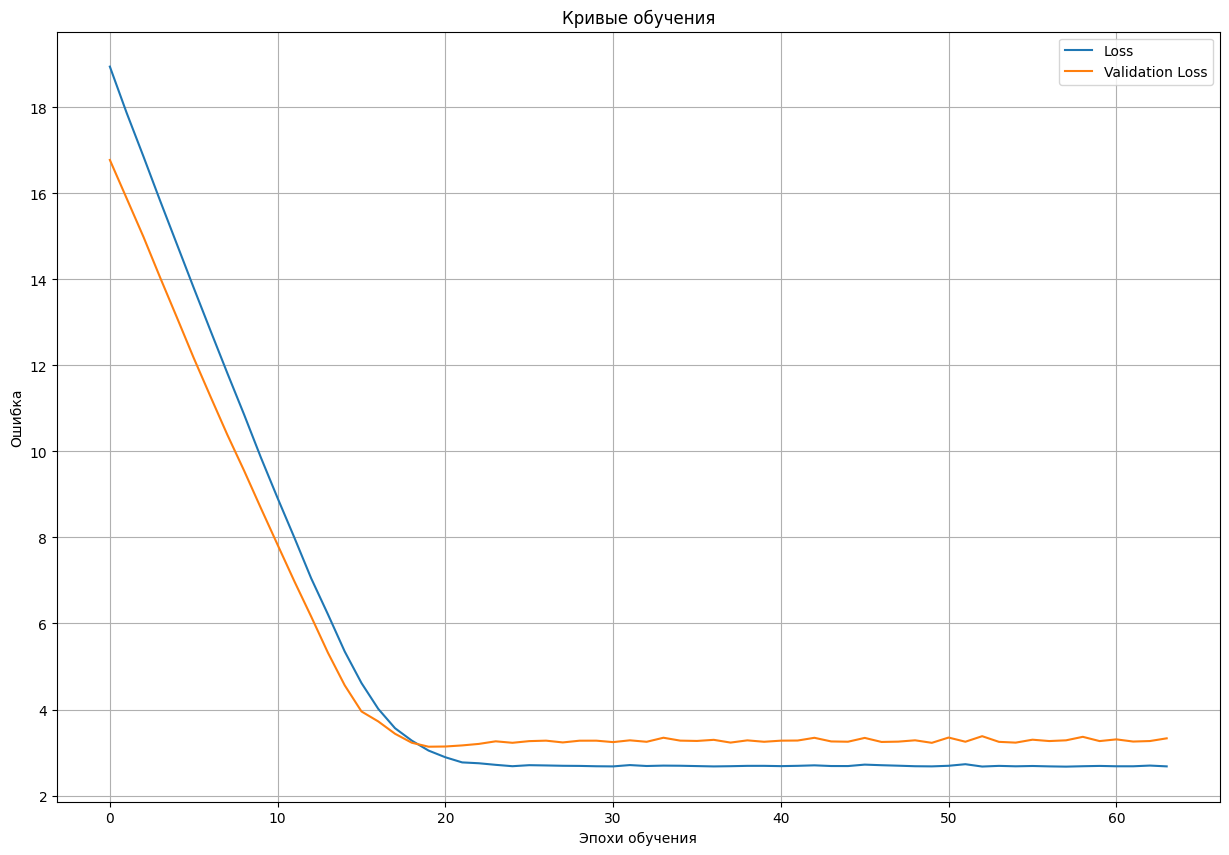

In [120]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Кривые обучения')
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.grid(True)

plot_loss(history_L1)

In [121]:
features_independent = X_test['FFMC']
features_dependent = y_test
features_other = X_test.drop(columns=['FFMC'])

In [122]:
X_plot = X_test.copy()
features_other_md = pd.DataFrame(features_other.median()).T
for key in features_other_md:
  X_plot[key] = float(features_other_md[key])
X_plot.head()

,area,DC,DMC,FFMC,ISI,RH,X,Y,day,month,wind
403,0.18,664.900024,108.350006,93.500000,8.0,42.0,4.0,4.0,3.0,7.0,4.0
5,0.18,664.900024,108.350006,89.599998,8.0,42.0,4.0,4.0,3.0,7.0,4.0
127,0.18,664.900024,108.350006,91.800003,8.0,42.0,4.0,4.0,3.0,7.0,4.0
436,0.18,664.900024,108.350006,89.300003,8.0,42.0,4.0,4.0,3.0,7.0,4.0
322,0.18,664.900024,108.350006,89.199997,8.0,42.0,4.0,4.0,3.0,7.0,4.0


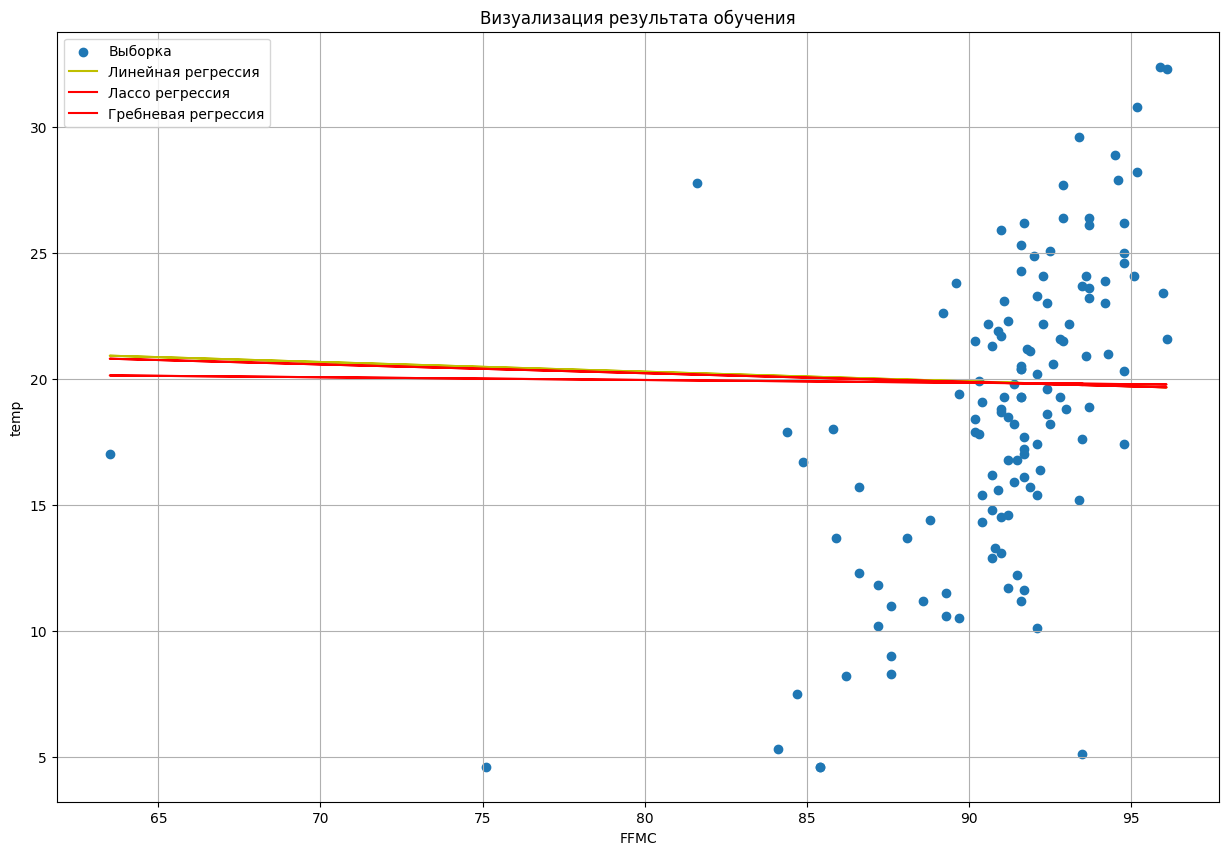

In [123]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.scatter(features_independent, features_dependent, label='Выборка')

plt.plot(features_independent, model_LN.predict(X_plot, verbose=0), color='y', label='Линейная регрессия')
plt.plot(features_independent, model_L1.predict(X_plot, verbose=0), color='r', label='Лассо регрессия')
plt.plot(features_independent, model_L2.predict(X_plot, verbose=0), color='red', label='Гребневая регрессия')

plt.title('Визуализация результата обучения')
plt.xlabel('FFMC')
plt.ylabel('temp')
plt.legend()
plt.grid(True)

plt.show()